# Rain

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

In [35]:
#Load the dataset
df = pd.read_csv('weather.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
# Choose the column
column_name = 'MaxTemp'

# Mean

In [37]:
mean_value = df['MaxTemp'].mean()
print(f"Mean: {mean_value}")

Mean: 23.22134827564685


# Median

In [38]:
median_value = df['MaxTemp'].median()
print(f"Median: {median_value}")

Median: 22.6


# Mode

In [39]:
mode_value = df['MaxTemp'].mode()
print(f"Mode: {mode_value}")

Mode: 0    20.0
Name: MaxTemp, dtype: float64


# Standard Deviation

In [40]:
std_dev = df['MaxTemp'].std()
print(f"Standard Deviation: {std_dev}")

Standard Deviation: 7.119048845979134


# Normalization

In [41]:
normalized_column = (df['MaxTemp'] - df['MaxTemp'].min()) / (df['MaxTemp'].max() - df['MaxTemp'].min())
print(f"Normalized Column:\n{normalized_column}")

Normalized Column:
0         0.523629
1         0.565217
2         0.576560
3         0.620038
4         0.701323
            ...   
145455    0.533081
145456    0.568998
145457    0.599244
145458    0.601134
145459         NaN
Name: MaxTemp, Length: 145460, dtype: float64


# Box Plot

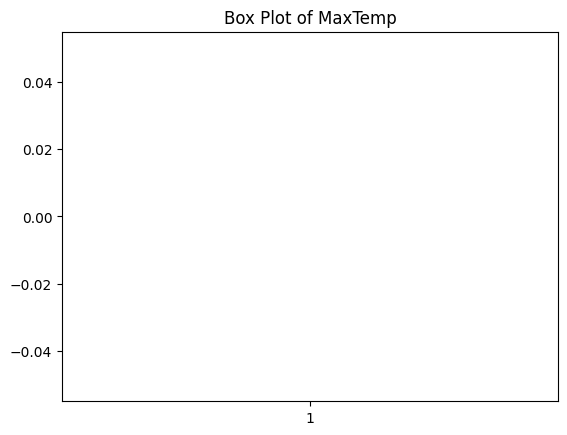

In [42]:
plt.boxplot(df['MaxTemp'])
plt.title(f'Box Plot of {'MaxTemp'}')
plt.show()

# Calculate skewness

In [43]:
skewness_value = skew(df['MaxTemp'].dropna())
print(f"Skewness: {skewness_value}")


Skewness: 0.220837050892215


# Interpretation of skewness

In [44]:
if skewness_value > 0:
    print("The data is positively skewed (right-skewed).")
elif skewness_value < 0:
    print("The data is negatively skewed (left-skewed).")
else:
    print("The data is symmetric.")

The data is positively skewed (right-skewed).


# Plot histogram to visualize

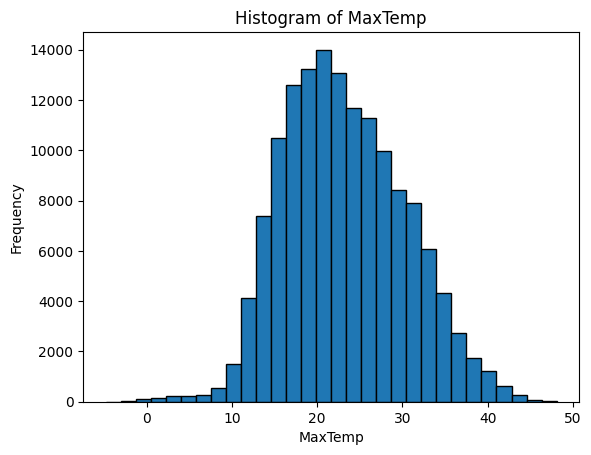

In [45]:
plt.hist(df[column_name], bins=30, edgecolor='black')
plt.title(f'Histogram of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()